In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

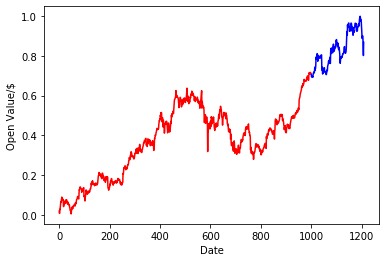

In [7]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

Using TensorFlow backend.


In [11]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/200
900/900 [==============================] - 33s 37ms/step - loss: 0.0133 - val_loss: 0.0071
Epoch 2/200
900/900 [==============================] - 6s 6ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 3/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0023 - val_loss: 0.001900
Epoch 4/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 5/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 6/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 7/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 8/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 9/200
900/900 [==============================] - 5s 6ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 10/200
900/900 [===================

Epoch 78/200
900/900 [==============================] - 5s 6ms/step - loss: 7.0387e-04 - val_loss: 1.7622e-04
Epoch 79/200
900/900 [==============================] - 5s 6ms/step - loss: 7.4658e-04 - val_loss: 2.6634e-04
Epoch 80/200
900/900 [==============================] - 5s 6ms/step - loss: 7.6003e-04 - val_loss: 9.5735e-04
Epoch 81/200
900/900 [==============================] - 6s 6ms/step - loss: 7.2979e-04 - val_loss: 9.1166e-04
Epoch 82/200
900/900 [==============================] - 5s 6ms/step - loss: 6.5557e-04 - val_loss: 1.2081e-04
Epoch 83/200
900/900 [==============================] - 5s 6ms/step - loss: 6.6250e-04 - val_loss: 2.7573e-04
Epoch 84/200
900/900 [==============================] - 5s 6ms/step - loss: 6.5240e-04 - val_loss: 3.7491e-04
Epoch 85/200
900/900 [==============================] - 5s 6ms/step - loss: 5.9718e-04 - val_loss: 5.9024e-04
Epoch 86/200
900/900 [==============================] - 5s 6ms/step - loss: 6.0006e-04 - val_loss: 5.1517e-04
Epoch 87/2

900/900 [==============================] - 5s 6ms/step - loss: 5.2386e-04 - val_loss: 1.4589e-04
Epoch 153/200
900/900 [==============================] - 6s 7ms/step - loss: 4.4730e-04 - val_loss: 1.1956e-04
Epoch 154/200
900/900 [==============================] - 6s 7ms/step - loss: 5.9797e-04 - val_loss: 2.9360e-04
Epoch 155/200
900/900 [==============================] - 5s 6ms/step - loss: 5.3225e-04 - val_loss: 8.5535e-05
Epoch 156/200
900/900 [==============================] - 5s 6ms/step - loss: 4.8809e-04 - val_loss: 1.0883e-04
Epoch 157/200
900/900 [==============================] - 5s 6ms/step - loss: 4.8540e-04 - val_loss: 2.0807e-04
Epoch 158/200
900/900 [==============================] - 5s 6ms/step - loss: 4.3812e-04 - val_loss: 8.3202e-05
Epoch 159/200
900/900 [==============================] - 5s 6ms/step - loss: 4.9948e-04 - val_loss: 2.5838e-04
Epoch 160/200
900/900 [==============================] - 5s 6ms/step - loss: 4.3985e-04 - val_loss: 5.1091e-04
Epoch 161/200
9

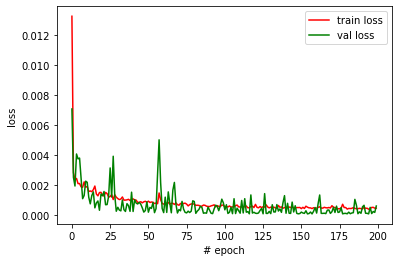

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.6470875680865833


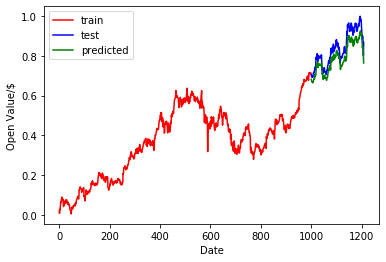

In [14]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

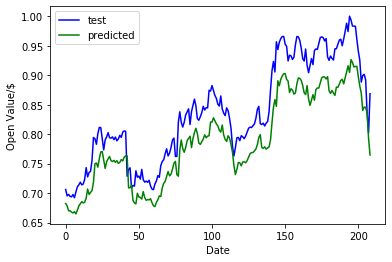

In [19]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()